In [1]:
import pkg_resources
import numpy as np
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from psifr import fr
data_file = pkg_resources.resource_filename('psifr', 'data/Morton2013.csv')

Load the data and merge study and recall.

In [2]:
df = pd.read_csv(data_file, dtype={'category': 'category'})
df.category.cat.as_ordered(inplace=True)

study = df.query('trial_type == "study"').copy()
recall = df.query('trial_type == "recall"').copy()
data = fr.merge_lists(study, recall, 
                      list_keys=['list_type', 'list_category'], 
                      study_keys=['category'])

Load semantic similarity estimates for each pair of items in the stimulus pool.

In [3]:
file = '/Users/morton/PycharmProjects/psifr-notebooks/MortEtal13_wiki2vec.mat'
mat = loadmat(file)
item = [i[0] for i in mat['item'][:, 0]]
item_index = mat['item_index'][:, 0]
psim = mat['pair_similarity']

Set item index based on the pool information.

In [4]:
data_index = np.empty(data.shape[0])
data_index.fill(np.nan)
for name, idx in zip(item, item_index):
    if (data['item'] == name).any():
        data_index[(data['item'] == name).to_numpy()] = idx
data.loc[:, 'item_index'] = data_index

In [5]:
data.loc[(data['subject'] == 1) & (data['list'] == 1)]

,subject,list,item,input,output,study,recall,repeat,intrusion,list_type,list_category,category,item_index
0,1,1,TOWEL,1.0,13.0,True,True,0,False,pure,obj,obj,742.0
1,1,1,LADLE,2.0,NaN,True,False,0,False,pure,obj,obj,630.0
2,1,1,THERMOS,3.0,NaN,True,False,0,False,pure,obj,obj,734.0
3,1,1,LEGO,4.0,18.0,True,True,0,False,pure,obj,obj,636.0
4,1,1,BACKPACK,5.0,10.0,True,True,0,False,pure,obj,obj,520.0
5,1,1,JACKHAMMER,6.0,7.0,True,True,0,False,pure,obj,obj,620.0
6,1,1,LANTERN,7.0,NaN,True,False,0,False,pure,obj,obj,632.0
7,1,1,DOORKNOB,8.0,11.0,True,True,0,False,pure,obj,obj,575.0
8,1,1,SHOVEL,9.0,9.0,True,True,0,False,pure,obj,obj,707.0
9,1,1,SHOVEL,9.0,19.0,False,True,1,False,pure,obj,obj,707.0


Define semantic similarity bins and calculate response probabilities by bin.

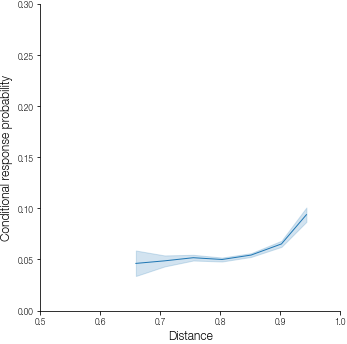

In [6]:
edges = [0.5299, 0.5799, 0.6299, 0.6799, 0.7299, 0.7799, 0.8299, 0.8799, 0.9299, 0.9799]
centers = [0.5620, 0.6102, 0.6593, 0.7073, 0.7552, 0.8032, 0.8516, 0.9023, 0.9440]
pure = data.query('list_type == "pure"')
crp = fr.distance_crp(pure, 'item_index', psim,
                      edges, centers=centers, count_unique=False)
g = fr.plot_distance_crp(crp, min_samples=10);
g.set(xlim=(.5, 1), ylim=(0, .3));

For lists with mixed categories, separately examine within- and between-category transitions.

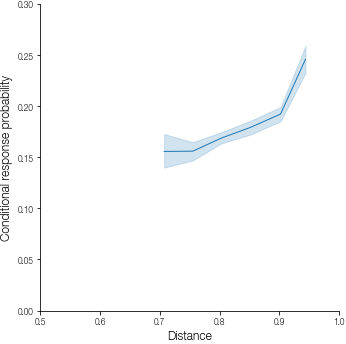

In [7]:
mixed = data.query('list_type == "mixed"')
crp = fr.distance_crp(mixed, 'item_index', psim,
                      edges, centers=centers, test_key='category',
                      test=lambda x, y: x == y)
g = fr.plot_distance_crp(crp, min_samples=10)
g.set(xlim=(.5, 1), ylim=(0, .3));

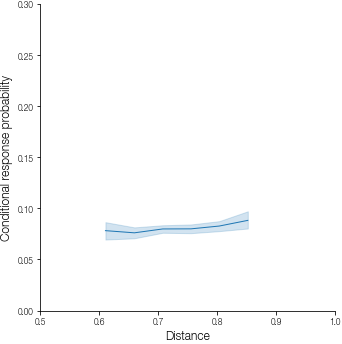

In [8]:
crp = fr.distance_crp(mixed, 'item_index', psim,
                      edges, centers=centers, test_key='category',
                      test=lambda x, y: x != y)
g = fr.plot_distance_crp(crp, min_samples=10)
g.set(xlim=(.5, 1), ylim=(0, .3));